In [1]:
import tensorflow as tf # Imports tensorflow
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense, Activation, Flatten, Dropout, BatchNormalization,Embedding
from tensorflow.keras.layers import Conv2D, MaxPooling2D, ReLU, LSTM,Bidirectional,Attention,Concatenate
from tensorflow.keras import regularizers, optimizers,losses
from tensorflow.keras.metrics import Recall,Precision,AUC,TruePositives,TrueNegatives,FalseNegatives,FalsePositives, SpecificityAtSensitivity,SensitivityAtSpecificity
from tensorflow.keras.utils import plot_model
from tensorflow.keras.preprocessing import image
from tensorflow.keras.utils import to_categorical
from tensorflow.python.keras.utils import np_utils
import numpy as np
import pandas as pd 
import matplotlib
import seaborn as sns
import sklearn

2023-07-23 21:44:51.972534: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
from imblearn.over_sampling import RandomOverSampler 
import imblearn
#from keras.optimizers import Adam
import matplotlib.pyplot as plt
import time
import os
import sklearn.metrics as m
from glob import glob
from sklearn.preprocessing import StandardScaler
from sklearn import tree
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
import skimage.io
import skimage.color
import skimage.filters

In [3]:
data = pd.read_csv('/Users/jdapeman/Documents/skin2/archive-2/hmnist_28_28_RGB.csv')
data

,pixel0000,pixel0001,pixel0002,pixel0003,pixel0004,pixel0005,pixel0006,pixel0007,pixel0008,pixel0009,...,pixel2343,pixel2344,pixel2345,pixel2346,pixel2347,pixel2348,pixel2349,pixel2350,pixel2351,label
0,192,153,193,195,155,192,197,154,185,202,...,173,124,138,183,147,166,185,154,177,2
1,25,14,30,68,48,75,123,93,126,158,...,60,39,55,25,14,28,25,14,27,2
2,192,138,153,200,145,163,201,142,160,206,...,167,129,143,159,124,142,136,104,117,2
3,38,19,30,95,59,72,143,103,119,171,...,44,26,36,25,12,17,25,12,15,2
4,158,113,139,194,144,174,215,162,191,225,...,209,166,185,172,135,149,109,78,92,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10010,183,165,181,182,165,180,184,166,182,188,...,208,185,187,208,186,186,206,187,189,0
10011,2,3,1,38,33,32,121,104,103,132,...,96,79,76,24,23,21,3,4,1,0
10012,132,118,118,167,149,149,175,156,160,184,...,204,181,178,181,159,153,172,151,145,0
10013,160,124,146,164,131,152,167,127,146,169,...,185,162,167,184,157,166,185,162,172,0


In [4]:
# seperating the target label and the dataframe pixles 

In [5]:
y = data['label']
x = data.drop(columns = ['label'])

In [6]:
# reading in the meta data
meta_data = pd.read_csv('/Users/jdapeman/Documents/skin2/archive-2/HAM10000_metadata.csv')
meta_data.head()

,lesion_id,image_id,dx,dx_type,age,sex,localization
0,HAM_0000118,ISIC_0027419,bkl,histo,80.0,male,scalp
1,HAM_0000118,ISIC_0025030,bkl,histo,80.0,male,scalp
2,HAM_0002730,ISIC_0026769,bkl,histo,80.0,male,scalp
3,HAM_0002730,ISIC_0025661,bkl,histo,80.0,male,scalp
4,HAM_0001466,ISIC_0031633,bkl,histo,75.0,male,ear


In [7]:
classes = {4: ('nv', ' melanocytic nevi'), 6: ('mel', 'melanoma'), 2 :('bkl', 'benign keratosis-like lesions'), 1:('bcc' , ' basal cell carcinoma'), 5: ('vasc', ' pyogenic granulomas and hemorrhage'), 0: ('akiec', 'Actinic keratoses and intraepithelial carcinomae'),  3: ('df', 'dermatofibroma')}

In [8]:
classes = {'mel':0 ,'vasc':1,'df':2,'nv':3,'bkl':4,'bcc':5,'ak':6}

Text(0.5, 1.0, 'Frequency Distribution of Classes')

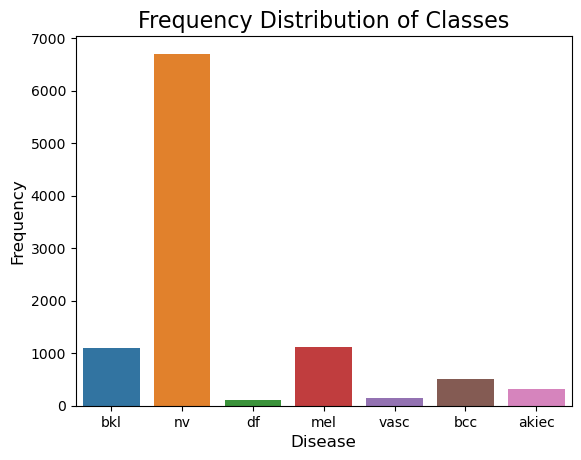

In [9]:
sns.countplot(x = 'dx', data = meta_data)
plt.xlabel('Disease', size=12)
plt.ylabel('Frequency', size=12)
plt.title('Frequency Distribution of Classes', size=16)

- This line creates an instance of the RandomOverSampler class. The RandomOverSampler is a specific oversampling technique that randomly replicates samples from the minority class until it reaches a balance with the majority class.

- Here, the fit_resample method is called on the oversampler instance. The fit_resample method takes two arguments: x, which represents the feature data, and y, which represents the corresponding target labels. It returns the oversampled x and y arrays.

- The overall effect of these two lines is to balance the class distribution in the dataset by oversampling the minority class. It duplicates some samples from the minority class until it has the same number of samples as the majority class, thus creating a more balanced dataset that can be used for training machine learning models. This is often done to improve the performance of the models, especially when the class imbalance is severe and the model tends to favor the majority class due to the lack of data for the minority class.

In [10]:
oversample = RandomOverSampler()
x,y  = oversample.fit_resample(x,y)

- converting the original 1D array x into a 4D array, where each element in the 4D array represents a 2D image with a height of 28 pixels, a width of 28 pixels, and 3 color channels (RGB). 

In [11]:
x = np.array(x).reshape(-1,28,28,3)
print('Shape of X :',x.shape)

Shape of X : (46935, 28, 28, 3)


In [12]:
y = to_categorical(y)

In [13]:
y.shape

(46935, 7)

- code performs a standardization (or z-score normalization) on the data stored in the NumPy array x. Standardization is a common preprocessing technique used in machine learning to scale and center the features of the data, making them have zero mean and unit variance.

In [14]:
x = (x-np.mean(x))/np.std(x)

In [15]:
x

array([[[[ 6.78535717e-01, -2.61229341e-01,  7.02632257e-01],
         [ 7.50825337e-01, -2.13036261e-01,  6.78535717e-01],
         [ 7.99018417e-01, -2.37132801e-01,  5.09859938e-01],
         ...,
         [ 7.02632257e-01, -4.78098201e-01, -2.61229341e-01],
         [ 7.99018417e-01, -2.37132801e-01, -2.02639415e-02],
         [ 7.26728797e-01, -2.85325881e-01, -9.25535614e-02]],

        [[ 7.99018417e-01, -4.43604815e-02,  9.19501117e-01],
         [ 8.95404577e-01, -9.25535614e-02,  7.99018417e-01],
         [ 9.19501117e-01, -9.25535614e-02,  7.02632257e-01],
         ...,
         [ 7.26728797e-01, -4.05808581e-01, -3.57615501e-01],
         [ 8.23114957e-01, -1.40746641e-01,  5.20256784e-02],
         [ 6.78535717e-01, -2.61229341e-01,  7.61222183e-02]],

        [[ 7.99018417e-01, -2.13036261e-01,  7.02632257e-01],
         [ 8.23114957e-01, -2.37132801e-01,  5.09859938e-01],
         [ 9.19501117e-01, -1.88939721e-01,  6.54439178e-01],
         ...,
         [ 7.26728797e-0

- This code uses the train_test_split function to split the dataset x and target labels y into four separate sets: X_train, X_test, Y_train, and Y_test. The split is done such that 20% of the data is reserved for testing (held out for evaluation), while the remaining 80% is used for training. The random_state=42 ensures that the split is reproducible across different runs of the code.

In [16]:
X_train, X_test, Y_train, Y_test = train_test_split(x,y, test_size=0.2, random_state=42)

In [17]:
Y_train.shape

(37548, 7)

In [18]:
X_train.shape

(37548, 28, 28, 3)

- The given function blockred(inp, filters) creates a block or a module for a neural network that applies a combination of different convolutional layers and pooling operations to the input inp with a specified number of filters. The function performs three sets of operations in parallel:

- Inception Block: It consists of a 1x1 convolution layer followed by max pooling and batch normalization.

- VGG + SqueezeNet Block: It involves two consecutive 3x3 convolutional layers, followed by max pooling, batch normalization, and dropout.

- InceptionResNet + SqueezeNet Block: It applies a combination of 3x3 and 1x1 convolutional layers followed by max pooling and batch normalization. The output of this block is obtained by adding the outputs of the Inception, VGG + SqueezeNet, and InceptionResNet + SqueezeNet blocks element-wise.

- The final output of this function is the combined result of all three operations, representing the features extracted from the input inp using various convolutional operations. This type of block is commonly used in deep learning architectures, especially in models that utilize a combination of inception-like and residual-like blocks to extract hierarchical features.

In [19]:
def blockred(inp,filters):
    #Inception
    x = Conv2D(filters, 1, activation="relu",padding='same',use_bias=False)(inp)
    x = layers.MaxPooling2D(2)(x)
    x = BatchNormalization(axis=1)(x)
    
    #VGG + SQuizenet
    y = Conv2D(filters*2,3,activation="relu", padding='same',use_bias=False,)(inp)
    y = Conv2D(filters,3,activation="relu", padding='same',use_bias=False,)(y)
    y = layers.MaxPooling2D(2)(y)
    y = BatchNormalization(axis=1)(y)
    y = Dropout(0.25)(y)
    
    #InceptionResnet+Squize
    z = Conv2D(filters*2, 3, activation="relu", padding='same',use_bias=False)(inp)
    z = Conv2D(filters, 1, activation="relu", padding='same',use_bias=False)(inp)  
    z = layers.MaxPooling2D(2)(z)
    z = BatchNormalization(axis=1)(z)
    output1 = layers.add([x,y,z])
    return output1


- This code defines a convolutional neural network (CNN) architecture for a multi-class classification task on 28x28 RGB images. The architecture consists of several layers, including three blocks defined by the blockred() function, followed by fully connected layers.

- Overall, this code creates a CNN model with three blocks of convolutional operations followed by fully connected layers for multi-class classification on 28x28 RGB images. The blocks defined by blockred() incorporate various convolutional layers, pooling, batch normalization, and dropout to extract meaningful features from the input data.

In [20]:
Name= "CNN0"

# An input layer for the model is defined with the shape (28, 28, 3), 
# representing 28x28 RGB images. The name "img" is given to this input layer.
inputs = keras.Input(shape=(28,28,3), name="img")


# A 2D convolutional layer with 32 filters, a kernel size of 3x3, 
# and ReLU activation function is applied to the input layer.
x = layers.Conv2D(32, 3, activation="relu")(inputs)


# The function blockred() is called with the output of the previous 
# convolutional layer and 32 filters. It creates the first block of operations.
bl1=blockred(x,32)


# The function blockred() is called again with the output of the
# first block (bl1) and 64 filters. It creates the second block of operations.
bl2=blockred(bl1,64)


# The function blockred() is called again with the output of the second block 
# (bl2) and 64 filters. It creates the third block of operations.
bl3=blockred(bl2,64)


# y = Conv2D(filters=128, kernel_size=(5, 5), activation='relu')(bl3)
# y = Conv2D(filters=128, kernel_size=(3, 3), activation='relu')(y)
# y = MaxPooling2D(pool_size=(2, 2))(y)
# y = BatchNormalization(axis=-1)(y)
# y = Dropout(0.25)(y)

# The output of the third block is flattened to prepare it for the fully connected layers.
y = Flatten()(bl3)

#  A fully connected layer with 256 units and ReLU activation function is applied.
y = Dense(256, activation='relu')(y)

#  A dropout layer is added to help prevent overfitting.
y = Dropout(0.5)(y)

# Another fully connected layer with 64 units and ReLU activation function is applied.
y = Dense(64, activation='relu')(y)

#  Another dropout layer is added.
y = Dropout(0.5)(y)


# The final fully connected layer with 7 units (assuming it's a 7-class classification task) 
# and a softmax activation function is applied to get the model's output probabilities for each class.
outputs=Dense(7, activation='softmax')(y)

# The Keras Model is created by specifying the inputs and outputs.
# It represents the complete CNN architecture.
model = keras.Model(inputs, outputs, name=Name)

# The summary of the model's architecture is printed, showing the layer types,
# output shapes, and the number of trainable parameters.
print(model.summary())




Model: "CNN0"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 img (InputLayer)            [(None, 28, 28, 3)]          0         []                            
                                                                                                  
 conv2d (Conv2D)             (None, 26, 26, 32)           896       ['img[0][0]']                 
                                                                                                  
 conv2d_2 (Conv2D)           (None, 26, 26, 64)           18432     ['conv2d[0][0]']              
                                                                                                  
 conv2d_3 (Conv2D)           (None, 26, 26, 32)           18432     ['conv2d_2[0][0]']            
                                                                                               

                                                                                                  
 conv2d_15 (Conv2D)          (None, 6, 6, 64)             4096      ['add_1[0][0]']               
                                                                                                  
 max_pooling2d_6 (MaxPoolin  (None, 3, 3, 64)             0         ['conv2d_11[0][0]']           
 g2D)                                                                                             
                                                                                                  
 batch_normalization_7 (Bat  (None, 3, 3, 64)             12        ['max_pooling2d_7[0][0]']     
 chNormalization)                                                                                 
                                                                                                  
 max_pooling2d_8 (MaxPoolin  (None, 3, 3, 64)             0         ['conv2d_15[0][0]']           
 g2D)     

- This code defines a callback function for a TensorFlow/Keras model called ModelCheckpoint. A callback is a set of functions applied at various stages during training to perform specific actions. In this case, the ModelCheckpoint callback saves the best model (based on validation accuracy) during training to a file named 'best_model.h5'.

- During the training process, the ModelCheckpoint callback will continuously check the validation accuracy of the model. If the validation accuracy improves (increases), it will save the model to the specified file path. This ensures that you have access to the best-performing model after training, rather than the final model at the last epoch. It can be useful for later evaluation or deployment of the model.

In [21]:
callback = tf.keras.callbacks.ModelCheckpoint(filepath='best_model.h5',
                                                  monitor='val_acc', mode='max',
                                                 verbose=1)

In [23]:
model.compile(optimizer= keras.optimizers.Adam(),
              loss=keras.losses.CategoricalCrossentropy() ,
              metrics=['acc',Recall(),Precision(),AUC(),TruePositives(),TrueNegatives(),FalseNegatives(),FalsePositives()])
history = model.fit(X_train, Y_train, epochs=20, validation_data=(X_test, Y_test), batch_size=32, callbacks=[callback])

Epoch 1/20
1174/1174 [==============================] - ETA: 0s - loss: 1.0695 - acc: 0.5936 - recall_1: 0.3997 - precision_1: 0.7668 - auc_1: 0.9044 - true_positives_1: 15007.0000 - true_negatives_1: 220725.0000 - false_negatives_1: 22541.0000 - false_positives_1: 4563.0000
Epoch 1: saving model to best_model.h5
1174/1174 [==============================] - 171s 144ms/step - loss: 1.0695 - acc: 0.5936 - recall_1: 0.3997 - precision_1: 0.7668 - auc_1: 0.9044 - true_positives_1: 15007.0000 - true_negatives_1: 220725.0000 - false_negatives_1: 22541.0000 - false_positives_1: 4563.0000 - val_loss: 0.7498 - val_acc: 0.7282 - val_recall_1: 0.5732 - val_precision_1: 0.8534 - val_auc_1: 0.9553 - val_true_positives_1: 5381.0000 - val_true_negatives_1: 55398.0000 - val_false_negatives_1: 4006.0000 - val_false_positives_1: 924.0000
Epoch 2/20
1174/1174 [==============================] - ETA: 0s - loss: 0.7860 - acc: 0.7074 - recall_1: 0.5772 - precision_1: 0.8214 - auc_1: 0.9485 - true_positives_1

Epoch 11/20
1174/1174 [==============================] - ETA: 0s - loss: 0.1986 - acc: 0.9276 - recall_1: 0.9131 - precision_1: 0.9422 - auc_1: 0.9955 - true_positives_1: 34286.0000 - true_negatives_1: 223185.0000 - false_negatives_1: 3262.0000 - false_positives_1: 2103.0000
Epoch 11: saving model to best_model.h5
1174/1174 [==============================] - 182s 155ms/step - loss: 0.1986 - acc: 0.9276 - recall_1: 0.9131 - precision_1: 0.9422 - auc_1: 0.9955 - true_positives_1: 34286.0000 - true_negatives_1: 223185.0000 - false_negatives_1: 3262.0000 - false_positives_1: 2103.0000 - val_loss: 0.1318 - val_acc: 0.9509 - val_recall_1: 0.9418 - val_precision_1: 0.9614 - val_auc_1: 0.9982 - val_true_positives_1: 8841.0000 - val_true_negatives_1: 55967.0000 - val_false_negatives_1: 546.0000 - val_false_positives_1: 355.0000
Epoch 12/20
1174/1174 [==============================] - ETA: 0s - loss: 0.1863 - acc: 0.9339 - recall_1: 0.9220 - precision_1: 0.9463 - auc_1: 0.9959 - true_positives_1

In [25]:
model.save(Name+'.h5')

pd.DataFrame.from_dict(history.history).to_csv(Name+'.csv',index=False)

/Users/jdapeman/anaconda3/envs/apple/lib/python3.10/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


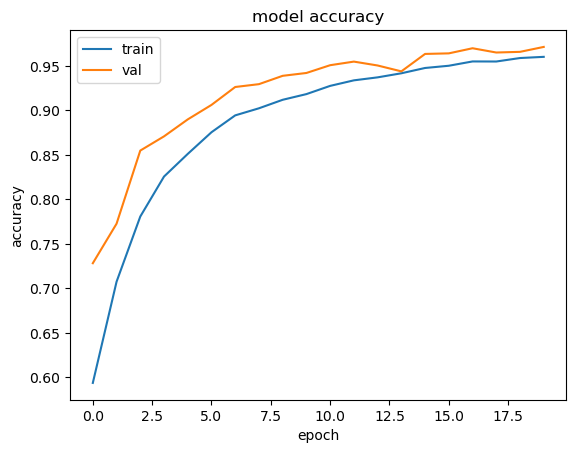

In [26]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

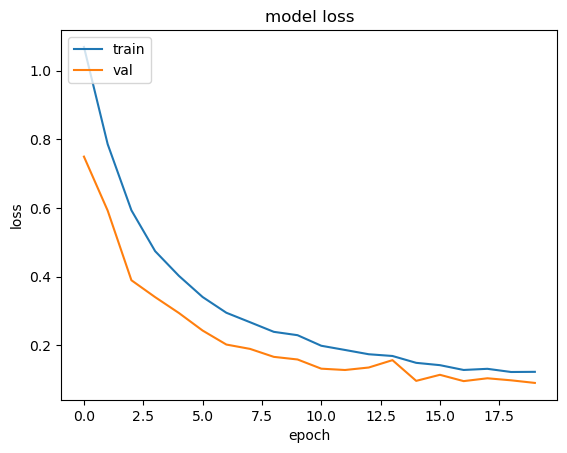

In [27]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [28]:
loss, acc,rec, = model.evaluate(X_test, Y_test, verbose=1)

294/294 [==============================] - 7s 24ms/step - loss: 0.0903 - acc: 0.9714 - recall_1: 0.9702 - precision_1: 0.9725 - auc_1: 0.9976 - true_positives_1: 9107.0000 - true_negatives_1: 56064.0000 - false_negatives_1: 280.0000 - false_positives_1: 258.0000


ValueError: too many values to unpack (expected 3)

In [39]:
model.save_weights('best_model_weights.h5')

294/294 [==============================] - 7s 25ms/step


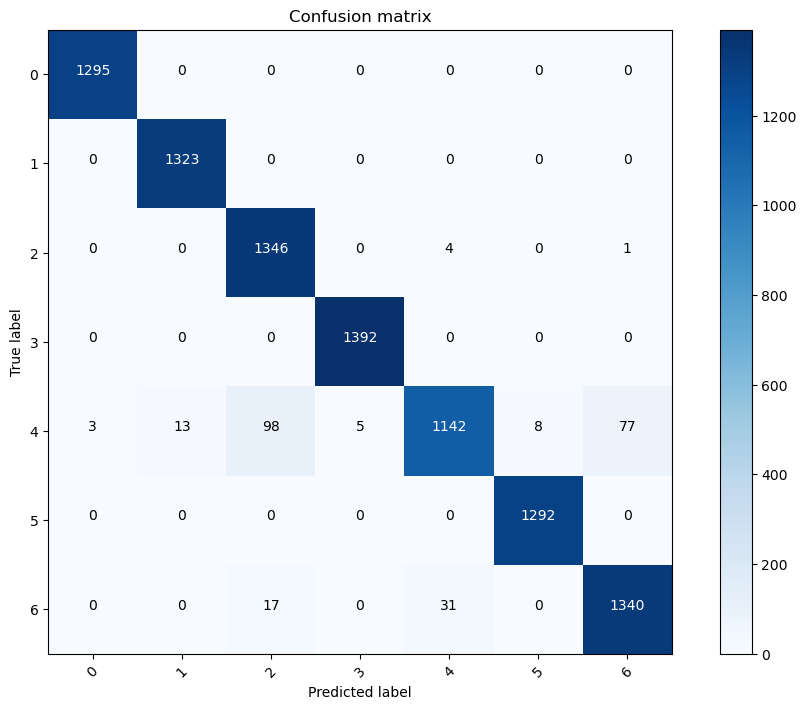

In [40]:
import itertools
from sklearn.metrics import confusion_matrix
# Function to plot confusion matrix    
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    
    fig, ax = plt.subplots(figsize = (10, 7))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    

Y_pred = model.predict(X_test)
# Convert predictions classes to one hot vectors 
Y_pred_classes = np.argmax(Y_pred,axis = 1) 
# Convert validation observations to one hot vectors
#Y_true = np.argmax(y_test,axis = 1) 
# compute the confusion matrix
confusion_mtx = confusion_matrix(np.argmax(Y_test,axis=1), Y_pred_classes)

# plot the confusion matrix
plot_confusion_matrix(confusion_mtx, classes.values()) 
    
    


In [41]:
from sklearn.metrics import classification_report
from sklearn.metrics import multilabel_confusion_matrix, classification_report, confusion_matrix
Y_pred = np.argmax(model.predict(X_test),axis=1)
print(classification_report(np.float32(np.argmax(Y_test,axis=1)), Y_pred.round()))
print('Classification Report')

294/294 [==============================] - 8s 26ms/step
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      1295
         1.0       0.99      1.00      1.00      1323
         2.0       0.92      1.00      0.96      1351
         3.0       1.00      1.00      1.00      1392
         4.0       0.97      0.85      0.91      1346
         5.0       0.99      1.00      1.00      1292
         6.0       0.94      0.97      0.96      1388

    accuracy                           0.97      9387
   macro avg       0.97      0.97      0.97      9387
weighted avg       0.97      0.97      0.97      9387

Classification Report


transfer learning --

In [42]:
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.applications.resnet_v2 import ResNet152V2

from tensorflow.keras.applications.efficientnet import EfficientNetB7

In [43]:
X_train_pad= np.pad(X_train,((0,0),(2,2),(2,2),(0,0)),'mean')

In [44]:
X_test_pad= np.pad(X_test,((0,0),(2,2),(2,2),(0,0)),'mean')

In [45]:
img_shape =(32,32,3)

Name= "ResNet"
classifier = ResNet152V2(
            include_top = False,input_shape=img_shape,
             weights='imagenet'
           )
fine_tune_at = 555
for layer in classifier.layers[:fine_tune_at]:
    layer.trainable = False
    
"""
# 
Name= "EfficientNetB7"
classifier = EfficientNetB7(
            include_top = False,input_shape=img_shape,
             weights='imagenet'
           )
fine_tune_at = 790
for layer in classifier.layers[:fine_tune_at]:
    layer.trainable = False

# 
Name= "VGG19"
classifier = VGG19(
            include_top = False,input_shape=img_shape,
             weights='imagenet'
           )

fine_tune_at = 20
for layer in classifier.layers[:fine_tune_at]:
    layer.trainable = False
"""
model = Sequential()
model.add(classifier)
model.add(Flatten())
model.add(BatchNormalization())
model.add(Dense(128, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(7, activation='softmax'))
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet152v2 (Functional)    (None, 1, 1, 2048)        58331648  
                                                                 
 flatten_1 (Flatten)         (None, 2048)              0         
                                                                 
 batch_normalization_9 (Bat  (None, 2048)              8192      
 chNormalization)                                                
                                                                 
 dense_3 (Dense)             (None, 128)               262272    
                                                                 
 batch_normalization_10 (Ba  (None, 128)               512       
 tchNormalization)                                               
                                                                 
 dropout_5 (Dropout)         (None, 128)               0

In [47]:
callback = tf.keras.callbacks.ModelCheckpoint(filepath='best_Resnet.h5',
                                                  monitor='val_acc', mode='max',
                                                 verbose=1)
model.compile(optimizer= keras.optimizers.Adam(),
              loss=keras.losses.CategoricalCrossentropy() ,
              metrics=['acc',Recall(),Precision(),AUC(),TruePositives(),TrueNegatives(),FalseNegatives(),FalsePositives()])
history = model.fit(X_train_pad, Y_train, epochs=20, validation_data=(X_test_pad, Y_test), batch_size=32, callbacks=[callback])

Epoch 1/20
1174/1174 [==============================] - ETA: 0s - loss: 1.3695 - acc: 0.5243 - recall_5: 0.3738 - precision_5: 0.6597 - auc_5: 0.8519 - true_positives_5: 14037.0000 - true_negatives_5: 218048.0000 - false_negatives_5: 23511.0000 - false_positives_5: 7240.0000
Epoch 1: saving model to best_Resnet.h5


/Users/jdapeman/anaconda3/envs/apple/lib/python3.10/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


1174/1174 [==============================] - 286s 238ms/step - loss: 1.3695 - acc: 0.5243 - recall_5: 0.3738 - precision_5: 0.6597 - auc_5: 0.8519 - true_positives_5: 14037.0000 - true_negatives_5: 218048.0000 - false_negatives_5: 23511.0000 - false_positives_5: 7240.0000 - val_loss: 0.9351 - val_acc: 0.7074 - val_recall_5: 0.5505 - val_precision_5: 0.8168 - val_auc_5: 0.9311 - val_true_positives_5: 5168.0000 - val_true_negatives_5: 55163.0000 - val_false_negatives_5: 4219.0000 - val_false_positives_5: 1159.0000
Epoch 2/20
1174/1174 [==============================] - ETA: 0s - loss: 0.7760 - acc: 0.7157 - recall_5: 0.6206 - precision_5: 0.8057 - auc_5: 0.9492 - true_positives_5: 23304.0000 - true_negatives_5: 219667.0000 - false_negatives_5: 14244.0000 - false_positives_5: 5621.0000
Epoch 2: saving model to best_Resnet.h5
1174/1174 [==============================] - 284s 242ms/step - loss: 0.7760 - acc: 0.7157 - recall_5: 0.6206 - precision_5: 0.8057 - auc_5: 0.9492 - true_positives_5:

In [48]:
model.save(Name+'.h5')

pd.DataFrame.from_dict(history.history).to_csv(Name+'.csv',index=False)

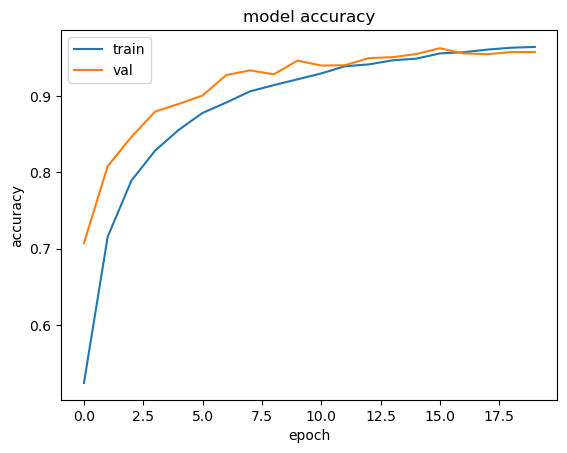

In [49]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [50]:
# plot in a confusion matrix the model scores and all the accuracy, f1, recall and percision scores 
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, recall_score, precision_score

# Get the predicted labels from the model
y_pred = model.predict(X_test_pad)
y_pred = np.argmax(y_pred, axis=1)

# Calculate the confusion matrix
cm = confusion_matrix(np.argmax(Y_test, axis=1), y_pred)

# Calculate the accuracy, f1 score, recall, and precision
accuracy = accuracy_score(np.argmax(Y_test, axis=1), y_pred)
f1 = f1_score(np.argmax(Y_test, axis=1), y_pred, average='weighted')
recall = recall_score(np.argmax(Y_test, axis=1), y_pred, average='weighted')
precision = precision_score(np.argmax(Y_test, axis=1), y_pred, average='weighted')

print("Confusion Matrix:")
print(cm)
print("Accuracy:", accuracy)
print("F1 Score:", f1)
print("Recall:", recall)
print("Precision:", precision)

294/294 [==============================] - 37s 121ms/step
Confusion Matrix:
[[1295    0    0    0    0    0    0]
 [   0 1323    0    0    0    0    0]
 [   0    0 1338    0    9    0    4]
 [   0    0    0 1392    0    0    0]
 [  12   24   99    4 1021   11  175]
 [   0    0    0    0    0 1292    0]
 [   1    0   38    0   21    0 1328]]
Accuracy: 0.9576009374667093
F1 Score: 0.9561653837130588
Recall: 0.9576009374667093
Precision: 0.9595070402422284


cheecking data files --